# SANGKAK_CHALLENGE FEB 2023

## problem statement:
NER(Name Entity Recognition) is a problem of information extraction which consist of extracting entity based on the semantical meaning. in short you can see it as multiclass classication
it uses across many product such email , resumer parser and more 
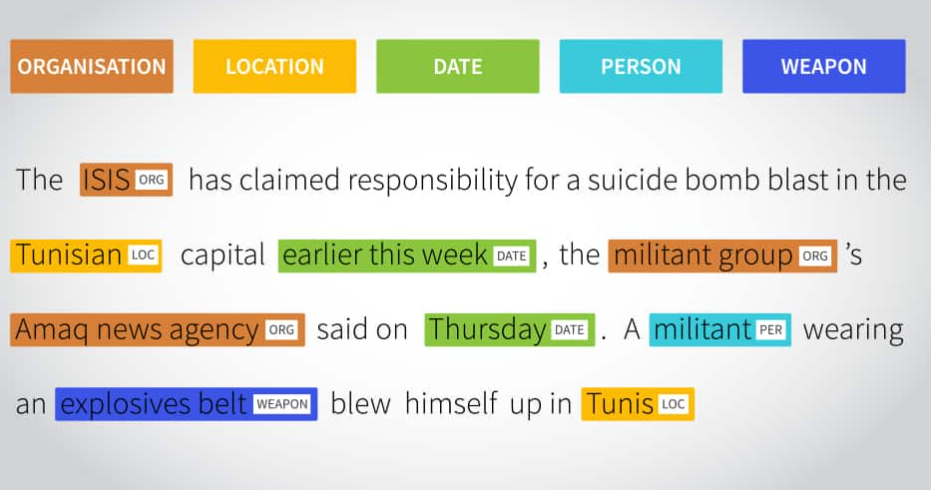

##  Solution steps:
1. load Ghomala data from the Masakhane data corpus
2. data preprocessing and parsing
3. model to fine turning trained model on Ghomala corpus
 

In [ ]:
!pip install jedi
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from simpletransformers.ner import NERModel,NERArgs

### clone and load dataset
p

In [ ]:
#clone massakhane repo for data set and utility
! git clone https://github.com/masakhane-io/masakhane-ner.git

Cloning into 'masakhane-ner'...
remote: Enumerating objects: 3923, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 3923 (delta 78), reused 103 (delta 50), pack-reused 3734
Receiving objects: 100% (3923/3923), 54.21 MiB | 17.11 MiB/s, done.
Resolving deltas: 100% (1666/1666), done.
Updating files: 100% (2133/2133), done.


In [ ]:

def read_and_parse(counter=0, filepath ="/content/masakhane-ner/MasakhaNER2.0/data/bbj/dev.txt"):
  dataset = []
  with open(filepath, encoding="utf-8") as f:
    for line in f:
      temp = []
      line = line.strip()
      if len(line) < 2  or line == "\n":
        counter +=1
      else:
        sentence_id = counter
        temp.append(sentence_id)
        temp += line.split(" ")
        dataset.append(temp)
  df = pd.DataFrame(dataset, columns =['sentence_id', 'words', 'labels'], dtype = str) 
  return df, counter


In [ ]:
train_data_1, count = read_and_parse(0, r"/content/masakhane-ner/MasakhaNER2.0/data/bbj/train.txt")
display(count)
train_data_2, count = read_and_parse(count, r"/content/masakhane-ner/MasakhaNER2.0/data/fon/train.txt")
display(count)
train_data_3, count = read_and_parse(count, r"/content/masakhane-ner/MasakhaNER2.0/data/ibo/train.txt")
display(count)
test_data, count = read_and_parse(count, r"/content/masakhane-ner/MasakhaNER2.0/data/bbj/test.txt")
display(count)
train_data = pd.concat([train_data_1, train_data_2, train_data_3],ignore_index = True)
display(train_data.head(30))
display(train_data.tail(50))
display(test_data.head(30))

3384

7727

15361

16327

,sentence_id,words,labels
0,0,Msaʼnyə̂,O
1,0,gɔtí,O
2,0,cyətə,O
3,0,nə́,O
4,0,bǎyá,O
5,0,cyə́,O
6,0,nəjí,O
7,0,pôʼ,O
8,0,bǎhə́lə́,O
9,1,mnwə,O


,sentence_id,words,labels
404825,15358,nke,O
404826,15358,Chineke,O
404827,15358,na,O
404828,15358,ịkwụba,O
404829,15358,aka,O
404830,15359,ọtọ,O
404831,15359,wee,O
404832,15359,duo,O
404833,15359,obodo,O
404834,15359,ha,O


,sentence_id,words,labels
0,15361,Brɛ́ndá,B-PER
1,15361,Biya,I-PER
2,15361,mú,O
3,15361,yə,O
4,15361,mjwǐ,O
5,15361,Fo,O
6,15361,gúŋ,O
7,15361,Ləpʉə,O
8,15361,Kaməlûm,B-LOC
9,15361,.,O


In [ ]:
#lsist of category for NER
label = train_data["labels"].unique().tolist()
label

['O', 'B-ORG', 'I-ORG', 'B-DATE', 'I-DATE', 'B-LOC', 'I-LOC', 'B-PER', 'I-PER']

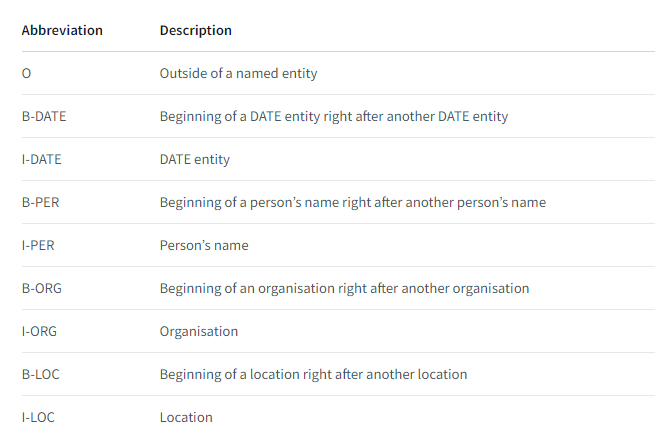

In [ ]:
train_data.describe()

,sentence_id,words,labels
count,404875,404875,404875
unique,15361,32555,9
top,7181,na,O
freq,84,14291,371073


In [ ]:
test_data.describe()

,sentence_id,words,labels
count,14958,14958,14958
unique,966,3609,9
top,16113,nə́,O
freq,45,523,13056


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#feature engineering and converting categorical variabel sentence numb to num
train_data["sentence_id"] = LabelEncoder().fit_transform(train_data["sentence_id"] )
train_data["labels"] = train_data["labels"].str.upper()
train_data.head(30)

test_data["sentence_id"] = LabelEncoder().fit_transform(test_data["sentence_id"] )
test_data["labels"] = test_data["labels"].str.upper()
test_data.head(30)


,sentence_id,words,labels
0,0,Brɛ́ndá,B-PER
1,0,Biya,I-PER
2,0,mú,O
3,0,yə,O
4,0,mjwǐ,O
5,0,Fo,O
6,0,gúŋ,O
7,0,Ləpʉə,O
8,0,Kaməlûm,B-LOC
9,0,.,O


modeling approach:
Use two solution approaches:
*   language specific model (bert-base)
*   multilingual or cross lingual model (roberta)



In [ ]:
args = NERArgs() # NER object see defasult paramter in simpletransformer
args.num_train_epochs = 30
args.learning_rate = 1e-4
args.overwrite_output_dir =True
args.train_batch_size = 32
args.eval_batch_size = 32

In [ ]:
###  fine tune  using base bert base  model
use_cuda= True
#prepare and define model architecture using args
model = NERModel('bert', 'bert-base-cased',labels=label,args =args)
# trined the moddel and eval 
model.train_model(train_data,eval_data = test_data,acc=accuracy_score)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

  0%|          | 0/21 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 1 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 2 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

(14430, 0.02264808031758172)

In [ ]:
# model eval and test model using test data
result, model_outputs, preds_list = model.eval_model(test_data)
# model performance
result

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

{'eval_loss': 0.4771577739907849,
 'precision': 0.673055242390079,
 'recall': 0.5674904942965779,
 'f1_score': 0.6157813305827746}

In [ ]:
### using roberta model
args1 = NERArgs() # NER object see defasult paramter in simpletransformer
args1.num_train_epochs = 10
args1.learning_rate = 1e-4
args1.overwrite_output_dir =True
args1.train_batch_size = 32
args1.eval_batch_size = 32


In [ ]:
#prepare and define model architecture using args
model2 = NERModel('roberta', 'roberta-base',labels=label,args =args1)
# trined the moddel and eval 
model2.train_model(train_data,eval_data = test_data,acc=accuracy_score)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able

  0%|          | 0/21 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/481 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 10:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/481 [00:00<?, ?it/s]

(4810, 0.05475832632207306)

In [ ]:
result2, model_outputs2, preds_list2 = model2.eval_model(test_data)
# model performance
result2

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

{'eval_loss': 0.19857420279614388,
 'precision': 0.728780487804878,
 'recall': 0.7175792507204611,
 'f1_score': 0.723136495643756}

In [ ]:
###  using xlm roberta large
### using roberta model
args2 = NERArgs() 
args2.num_train_epochs = 30
args2.learning_rate = 1e-4
args2.overwrite_output_dir =True
args2.train_batch_size = 32
args2.eval_batch_size = 32

In [ ]:
#prepare and define model architecture using args
model3 = NERModel('roberta', 'roberta-base',labels=label,args =args2)
# trined the moddel and eval 
model3.train_model(train_data,eval_data = test_data,acc=accuracy_score)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able

  0%|          | 0/21 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 2 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/481 [00:00<?, ?it/s]

(14430, 0.02690151552440496)

In [ ]:
result3, model_outputs3, preds_list3 = model2.eval_model(test_data)
# model performance
result3

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

{'eval_loss': 0.19857420279614388,
 'precision': 0.728780487804878,
 'recall': 0.7175792507204611,
 'f1_score': 0.723136495643756}

# Masakhaner result
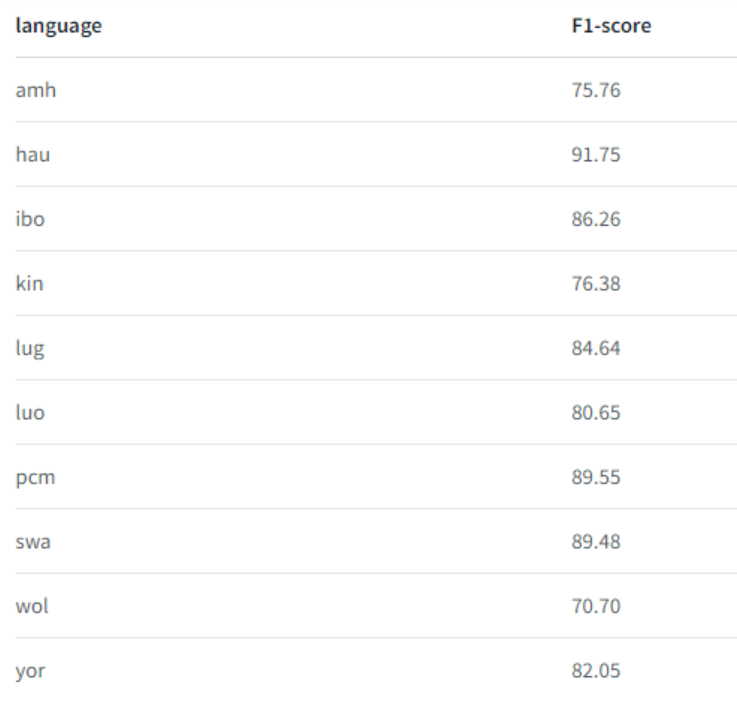

## Challenge:
1. lack of domaine knowledge to build new feature engineering
2. data missing POS as potential feature for more context




## NEXT STEP : use masakhanee roebrta african language to fine tune on ngomala!!